In [1]:
# %%
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
digits = datasets.load_digits()

In [3]:
digits.images.shape

(1797, 8, 8)

In [4]:
digits.images[0, :, :]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
set(digits.target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

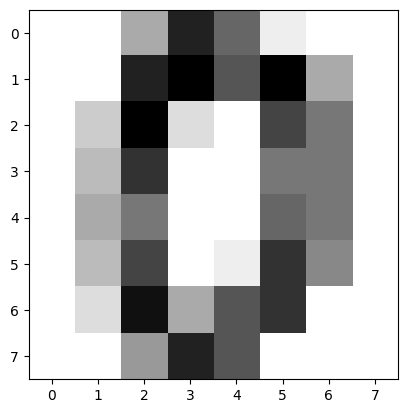

In [6]:
plt.figure()
plt.imshow(digits.images[0], cmap=plt.cm.binary)
plt.grid(False)
plt.show()

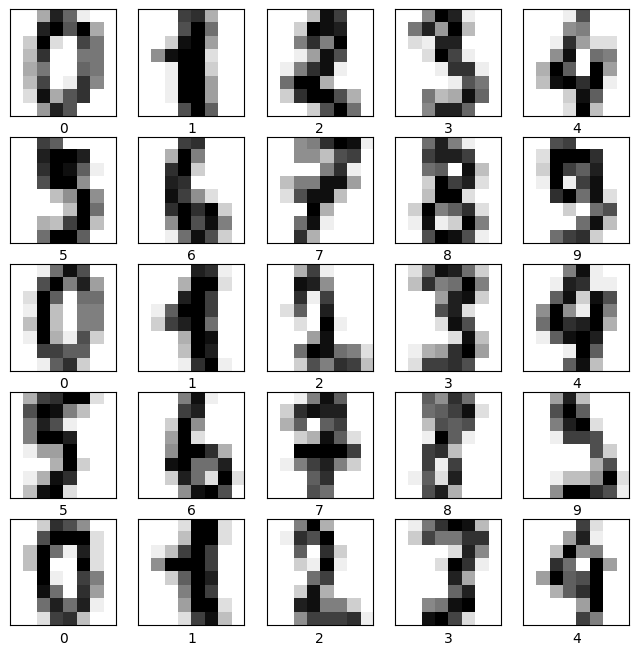

In [7]:
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(digits.images[i], cmap=plt.cm.binary)
    plt.xlabel(digits.target[i])
plt.show()

In [8]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
data.shape

(1797, 64)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    data,
    digits.target,
    test_size=0.5,
    shuffle=False,
)

In [12]:
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression(max_iter=2000)
estimator

LogisticRegression(max_iter=2000)

In [13]:
estimator.fit(
    X_train,
    y_train,
)

LogisticRegression(max_iter=2000)

In [14]:
from sklearn.metrics import accuracy_score


accuracy_score(y_true=y_train, y_pred=estimator.predict(X_train))

1.0

In [15]:
predictions = estimator.predict(X_test)
predicted_proba = estimator.predict_proba(X_test)

accuracy_score(y_true=y_test, y_pred=predictions)

0.932146829810901

Confusion matrix:
[[85  0  0  0  1  0  2  0  0  0]
 [ 0 80  0  1  0  0  0  0  2  8]
 [ 0  0 84  2  0  0  0  0  0  0]
 [ 0  0  0 77  0  4  0  2  7  1]
 [ 0  0  0  0 85  0  3  0  0  4]
 [ 0  0  0  0  0 87  2  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  1  0  0 85  1  2]
 [ 0  2  1  0  0  4  1  1 78  1]
 [ 1  0  0  0  0  2  0  0  2 87]]


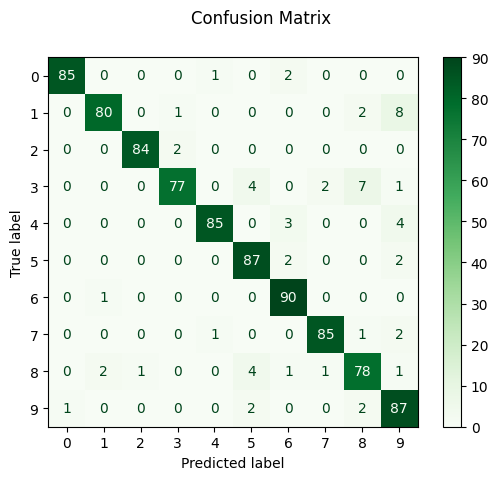

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    predictions,
    cmap="Greens",
)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

In [18]:
def plot_image(i, predicted_label, true_label, predicted_proba, img):

    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    #
    plt.imshow(img, cmap=plt.cm.binary)

    if predicted_label[i] == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            predicted_label[i],
            100 * max(predicted_proba[i, :]),
            true_label,
        ),
        color=color,
    )
def plot_image(i, predicted_label, true_label, predicted_proba, img):

    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    #
    plt.imshow(img, cmap=plt.cm.binary)

    if predicted_label[i] == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            predicted_label[i],
            100 * max(predicted_proba[i, :]),
            true_label,
        ),
        color=color,
    )

In [19]:
def plot_value_array(i, predicted_proba, predicted_label, true_label):
    #
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predicted_proba[i, :], color="#777777")
    plt.ylim([0, 1])
    #
    thisplot[predicted_label[i]].set_color("red")
    thisplot[true_label[i]].set_color("blue")

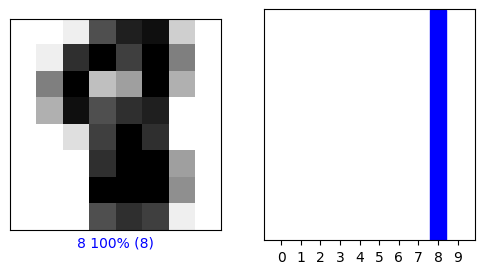

In [20]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(
    i,
    predictions,
    y_test,
    predicted_proba,
    X_test.reshape(len(X_test), 8, 8),
)
plt.subplot(1, 2, 2)
plot_value_array(
    i,
    predicted_proba,
    predictions,
    y_test,
)
plt.show()

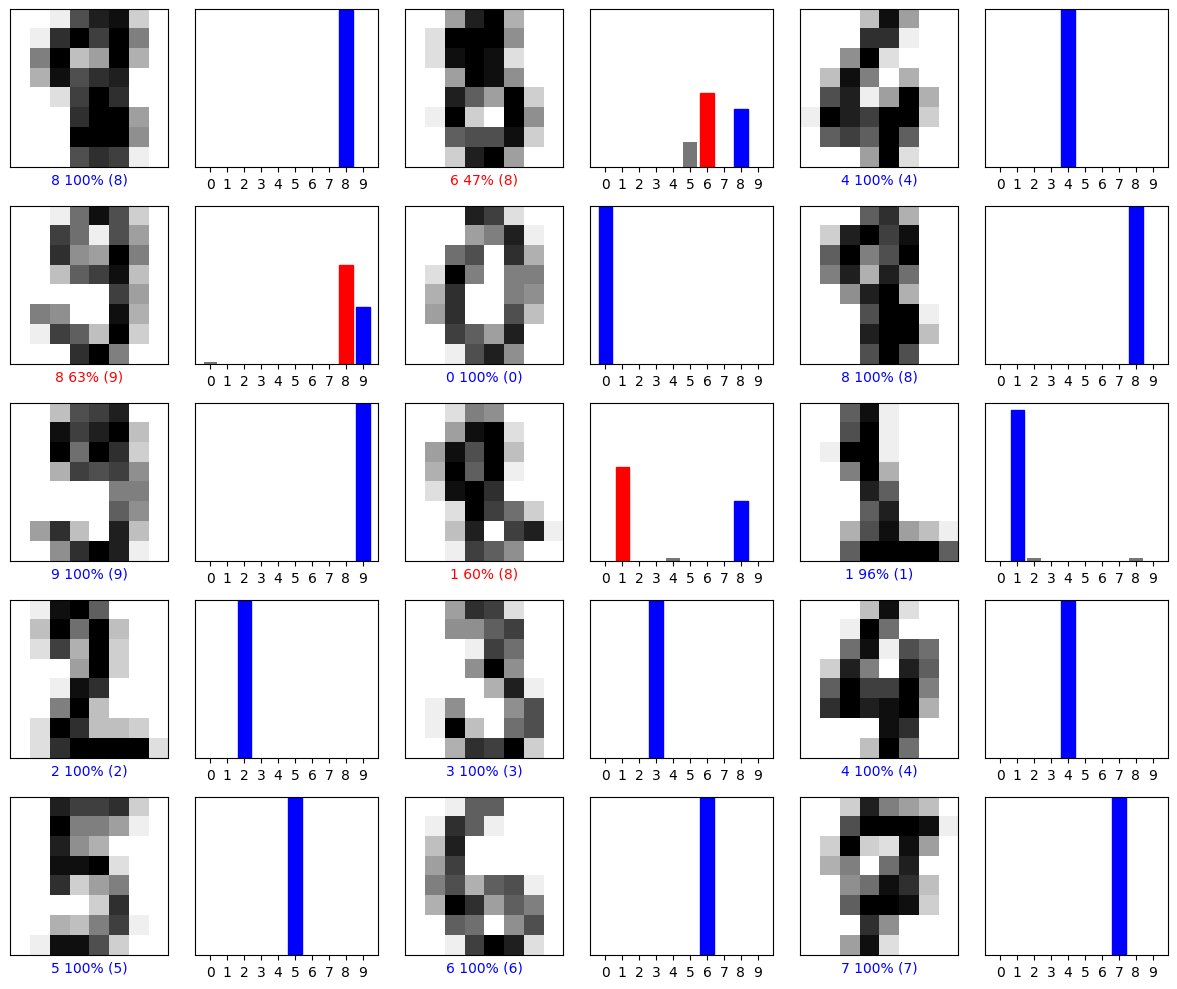

In [21]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(
        i,
        predictions,
        y_test,
        predicted_proba,
        X_test.reshape(len(X_test), 8, 8),
    )
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(
        i,
        predicted_proba,
        predictions,
        y_test,
    )
plt.tight_layout()
plt.show()

In [25]:
import pickle

with open("estimator.pkl", "wb") as file:
    pickle.dump(estimator, file)
        	

In [26]:
with open("estimator.pkl", "rb") as file:
    new_clf = pickle.load(file)

accuracy_score(
    y_true=digits.target,
    y_pred=new_clf.predict(data),
)

0.9660545353366722